In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
train_ds="/kaggle/input/traffic-net/trafficnet_dataset_v1/train"
test_ds="/kaggle/input/traffic-net/trafficnet_dataset_v1/test"

In [8]:
os.listdir('/kaggle/input/traffic-net/trafficnet_dataset_v1/train')

['fire', 'sparse_traffic', 'accident', 'dense_traffic']

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [10]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [11]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [12]:
img= train_generator[0]
print(img)

(array([[[[122.19615   , 213.26      , 199.34462   ],
         [130.53465   , 223.11636   , 209.37447   ],
         [130.07797   , 224.53712   , 209.9996    ],
         ...,
         [125.13328   , 143.46648   , 131.73305   ],
         [125.13328   , 143.46648   , 131.73305   ],
         [125.13328   , 143.46648   , 131.73305   ]],

        [[112.82909   , 207.28912   , 208.38693   ],
         [118.32223   , 219.40685   , 222.33655   ],
         [116.89662   , 219.36751   , 223.24768   ],
         ...,
         [126.89969   , 149.64891   , 141.44829   ],
         [126.89969   , 149.64891   , 141.44829   ],
         [126.89969   , 149.64891   , 141.44829   ]],

        [[ 92.66411   , 190.5559    , 206.37056   ],
         [ 95.2344    , 200.12523   , 218.9415    ],
         [ 92.887886  , 201.45581   , 222.91609   ],
         ...,
         [203.64058   , 231.63887   , 226.13802   ],
         [203.64058   , 231.63887   , 226.13802   ],
         [203.64058   , 231.63887   , 226.13802   ]]

In [13]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [14]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 4)


In [15]:
print(len(train_generator))
print(len(test_ds))

113
52


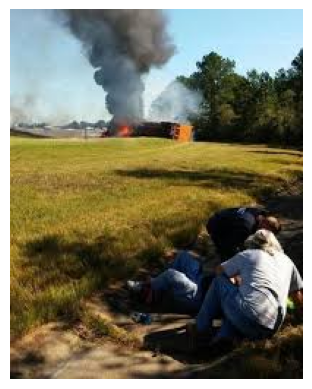

In [16]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/traffic-net/trafficnet_dataset_v1/train/fire/images_148 (2).jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D



In [18]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [19]:
model = VGG19((224, 224, 3))

In [20]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [21]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [22]:
history =model.fit(train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
113/113 [==============================] - 108s 753ms/step - loss: 1.3501 - accuracy: 0.3250 - val_loss: 1.2340 - val_accuracy: 0.3700
Epoch 2/20
113/113 [==============================] - 66s 580ms/step - loss: 1.0663 - accuracy: 0.5194 - val_loss: 1.0240 - val_accuracy: 0.5625
Epoch 3/20
113/113 [==============================] - 66s 582ms/step - loss: 0.9136 - accuracy: 0.6081 - val_loss: 0.8088 - val_accuracy: 0.6687
Epoch 4/20
113/113 [==============================] - 66s 579ms/step - loss: 0.8266 - accuracy: 0.6569 - val_loss: 0.8207 - val_accuracy: 0.6775
Epoch 5/20
113/113 [==============================] - 65s 576ms/step - loss: 0.8074 - accuracy: 0.6581 - val_loss: 0.6980 - val_accuracy: 0.7275
Epoch 6/20
113/113 [==============================] - 66s 586ms/step - loss: 0.7680 - accuracy: 0.6828 - val_loss: 0.6762 - val_accuracy: 0.7337
Epoch 7/20
113/113 [==============================] - 65s 573ms/step - loss: 0.7239 - accuracy: 0.7156 - val_loss: 0.6626 - val_a

In [23]:
n_categories = len(os.listdir('/kaggle/input/traffic-net/trafficnet_dataset_v1/test'))# number of categories print(n_categories)

In [24]:
n_categories

4

In [25]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.350095,0.325000,1.233965,0.37000
1,1.066272,0.519444,1.024046,0.56250
2,0.913610,0.608056,0.808841,0.66875
3,0.826622,0.656944,0.820715,0.67750
4,0.807376,0.658056,0.698014,0.72750


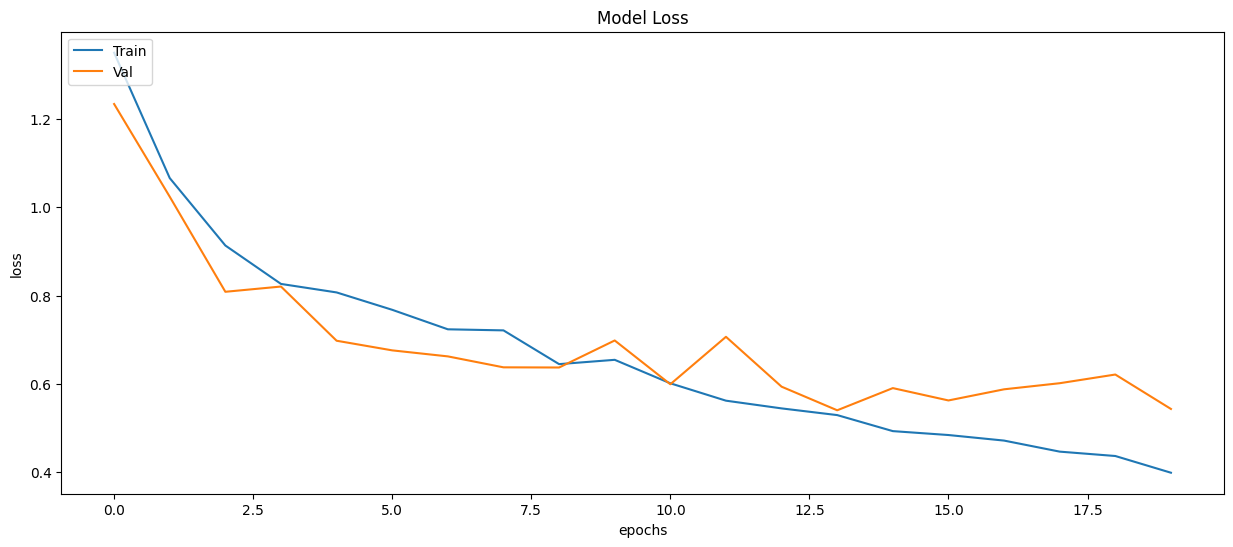

In [26]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

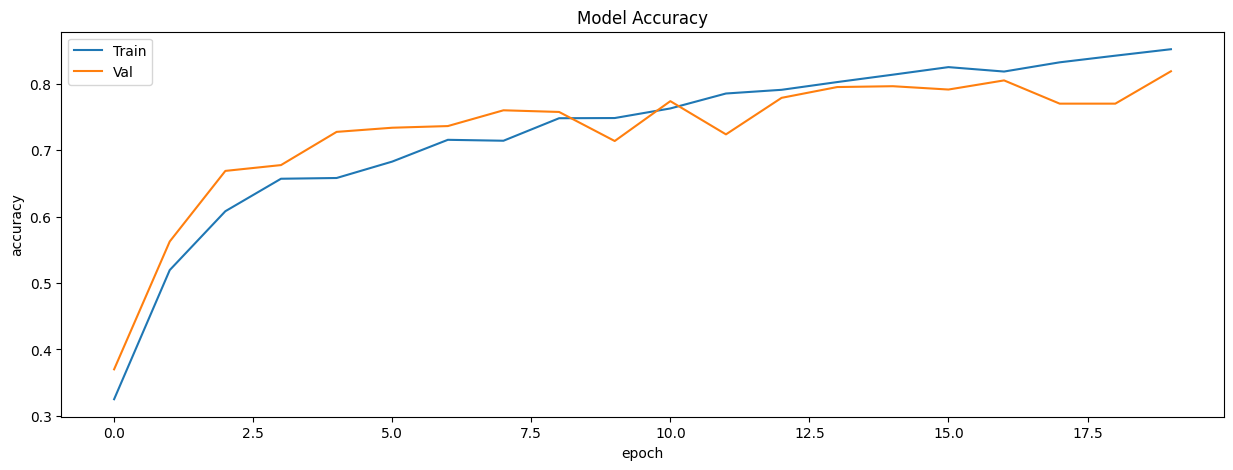

In [27]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [28]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

25/25 [==============================] - 4s 146ms/step


In [29]:
results =model.evaluate(test_generator)

25/25 [==============================] - 4s 149ms/step - loss: 0.5436 - accuracy: 0.8188


7/7 [==============================] - 3s 463ms/step


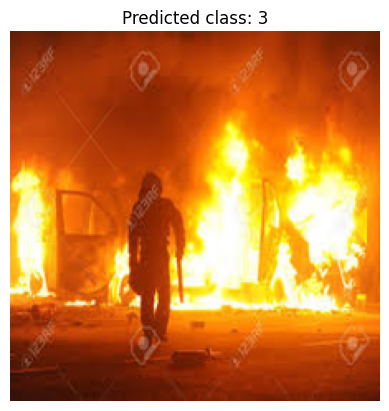

In [30]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/traffic-net/trafficnet_dataset_v1/test/fire'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [31]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {test_ds[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : g
Class probability: 0.5640035
Predicted class for 2.jpg : g
Class probability: 0.5765405
Predicted class for 3.jpg : g
Class probability: 0.60396105
Predicted class for 4.jpg : g
Class probability: 0.54085875
Predicted class for 5.jpg : g
Class probability: 0.6614669
Predicted class for 6.jpg : g
Class probability: 0.5656097
Predicted class for 7.jpg : g
Class probability: 0.56800544
Predicted class for 8.jpg : g
Class probability: 0.61929214
Predicted class for 9.jpg : g
Class probability: 0.62658817
Predicted class for 10.jpg : g
Class probability: 0.6327869
Predicted class for 11.jpg : g
Class probability: 0.595716
Predicted class for 12.jpg : g
Class probability: 0.6083929
Predicted class for 13.jpg : g
Class probability: 0.58508533
Predicted class for 14.jpg : g
Class probability: 0.58551365
Predicted class for 15.jpg : g
Class probability: 0.5913422
Predicted class for 16.jpg : g
Class probability: 0.5728707
Predicted class for 17.jpg : g
Class probab